# Analisis Exploratorio de datos

El dataset estudiado es el automobile dataset del UCI Machine Learning Repository [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile) , el cual contiene información de automóviles de distintas marcas y modelos.
El dataset contiene atributos tales como tipo de combustible *(fuel-type)*, cilindraje *(engine-size)*, precio *(price)*, entre otros.

El target o variable a predecir es *price*, el precio del vehículo dadas todas las características del dataset.


Se utlizan las siguientes librerías:
- Data management
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

- Análisis y estadística
    - [scipy](https://scipy.org/)
    


In [395]:
# Data analysis
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 120})
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [321]:
# Leer el archivo, se adicionan los nombres de las columnas puesto el archivo original no los trae
df = pd.read_csv('auto.csv', sep = ",", names=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"])

In [234]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [235]:
# list the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [236]:
# Dimensiones del dataset
print('Número de filas y columnas:',df.shape)
print('Nombres de las columnas:',df.columns)

Número de filas y columnas: (205, 26)
Nombres de las columnas: Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [237]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Los nulos o missing data vienen representados por ? por lo tanto se reemplazan como valores nulos o NaN para tratarlos posteriormente

In [322]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Missing data

Con los métodos *isnull()* y *notnull()* se pueden verificar los valores nulos o faltantes.

"True" significa valor nulo, mientras que "False" significa que no hay nulos.



In [241]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [263]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
normalized-losses,41,0.200000
price,4,0.019512
stroke,4,0.019512
bore,4,0.019512
peak-rpm,2,0.009756
num-of-doors,2,0.009756
horsepower,2,0.009756
engine-type,0,0.000000
highway-mpg,0,0.000000
city-mpg,0,0.000000


Se presentan valores faltantes en algunas columnas:

- "normalized-losses": 41 missing data
- "num-of-doors": 2 missing data
- "bore": 4 missing data
- "stroke" : 4 missing data
- "horsepower": 2 missing data
- "peak-rpm": 2 missing data
- "price": 4 missing data

Se pueden eliminar las filas, las columnas o reemplazarlas con el promedio, mediana o moda, para este ejemplo se reemplazan con el promedio de cada columna

In [323]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [324]:
# ==================================================================
# Valor reemplazado con el promedio de cada columna
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [325]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [326]:
# ==================================================================
# Valor reemplazado con el promedio de cada columna
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [327]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print("Average of stroke: ", avg_stroke) 

Average of stroke:  3.255422885572139


In [328]:
# ==================================================================
# Valor reemplazado con el promedio de cada columna
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [329]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [330]:
# ==================================================================
# Valor reemplazado con el promedio de cada columna
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [331]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [332]:
# ==================================================================
# Valor reemplazado con el promedio de cada columna
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [333]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [334]:
# ==================================================================
# Valor reemplazado con la frecuencia más alta
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [335]:
# ============================================================================================
# En este caso se eliminan las filas puesto son 4 y que además 'price' es el target a predecir
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [336]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)
# Dataset sin nulos

,Total,Percent
symboling,0,0.0
normalized-losses,0,0.0
highway-mpg,0,0.0
city-mpg,0,0.0
peak-rpm,0,0.0
horsepower,0,0.0
compression-ratio,0,0.0
stroke,0,0.0
bore,0,0.0
fuel-system,0,0.0


Cambio de tipo de datos en algunas variables

In [343]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [344]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
heigth               float64
dtype: object

Algunas columnas se estandarizan puesto las unidades de medida pueden ser confusas, en este caso el consumo de combustible  se indica en las columnas *city-mpg* y *highway-mpg* mpg(miles per gallon) por lo tanto los convertimos a  L/100km es decir consumo de combustible por 100 km:
*  L/100km = 235 / mpg

In [337]:
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

Normalizacion de datos para que escalas similares con las siguientes variables:
 * length
 * width
 * height

In [338]:
df[["length","width","height"]].head()
# Antes del cambio

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [339]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['heigth']= df['height']/df['height'].max()

In [340]:
df[["length","width","height"]].head()
# Despues de escalar las variables

,length,width,height
0,0.811148,0.890278,48.8
1,0.811148,0.890278,48.8
2,0.822681,0.909722,52.4
3,0.848630,0.919444,54.3
4,0.848630,0.922222,54.3


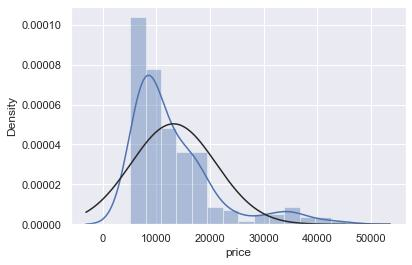

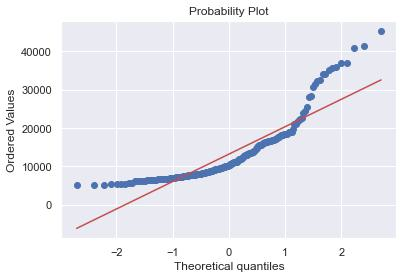

In [378]:
# ============================================
# Histograma y gráfico de probabilidad normal
sns.distplot(df['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot = plt)

Skewness positiva, la mayoría de de precios están entre 10000 y 20000, la distribución del target no es normal, el gráfico QQ indica que que no sigue una distribución normal puesto debe seguir la línea diagonal.

In [375]:
# ========================================
# Asimetría y curtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.809675
Kurtosis: 3.231537


La curtosis es bastante alta puesto generalmente una ligera desviación está entre 2 y -2

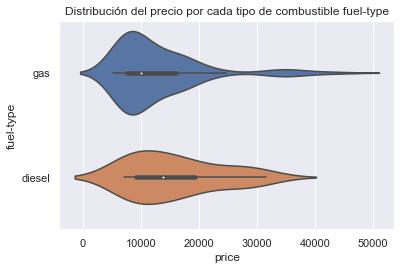

In [367]:
# ============================================================================
# Gráfico violinplot

fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'price',
        y     = 'fuel-type',
        data  = df,
        ax    = ax
    )

ax.set_title('Distribución del precio por cada tipo de combustible fuel-type');

El violinplot indica una mayor distribución para los vehículos a *gasolina*, la mediana en 10000 la mayoría de vehículos entre 70000 y 10000 el otro pico entre 30000 y 400000. El caso de *diesel* es mas constante no presenta un pico visible en la distribución la mayoría de de muestras no estan sobre la mediana.

In [392]:
# ======================================
# Matriz de correlación
# Dataframe df
corr_matrix = df.corr(method='pearson')
corr_matrix.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,heigth
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.550160
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.373737
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.590742
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.492063
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.306002


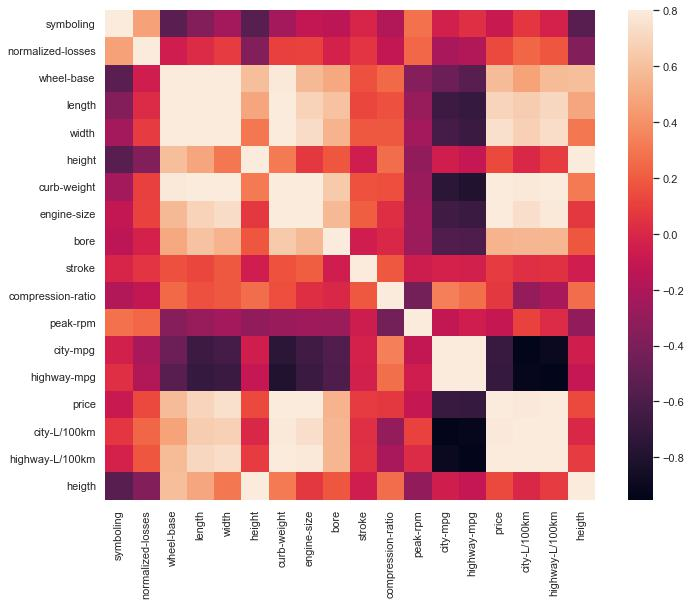

In [393]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Dataset bastante correlacionado, correlaciones altas con price: *city-L/100km, highway-L/100km, horsepower, engine-size, curb-weight*

In [394]:
df.corr()['price'].sort_values()

highway-mpg         -0.704692
city-mpg            -0.686571
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082269
normalized-losses    0.133999
heigth               0.135486
height               0.135486
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
highway-L/100km      0.801118
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

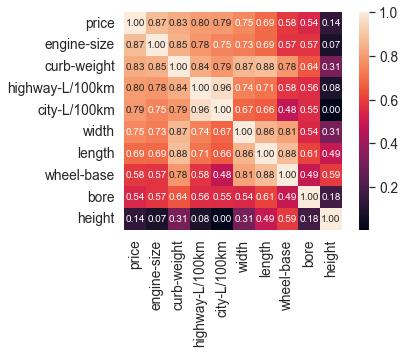

In [353]:
# De esta manera se seleccionan 10 variables para ver el heatmap de correlaciones mas detallado
k = 10
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

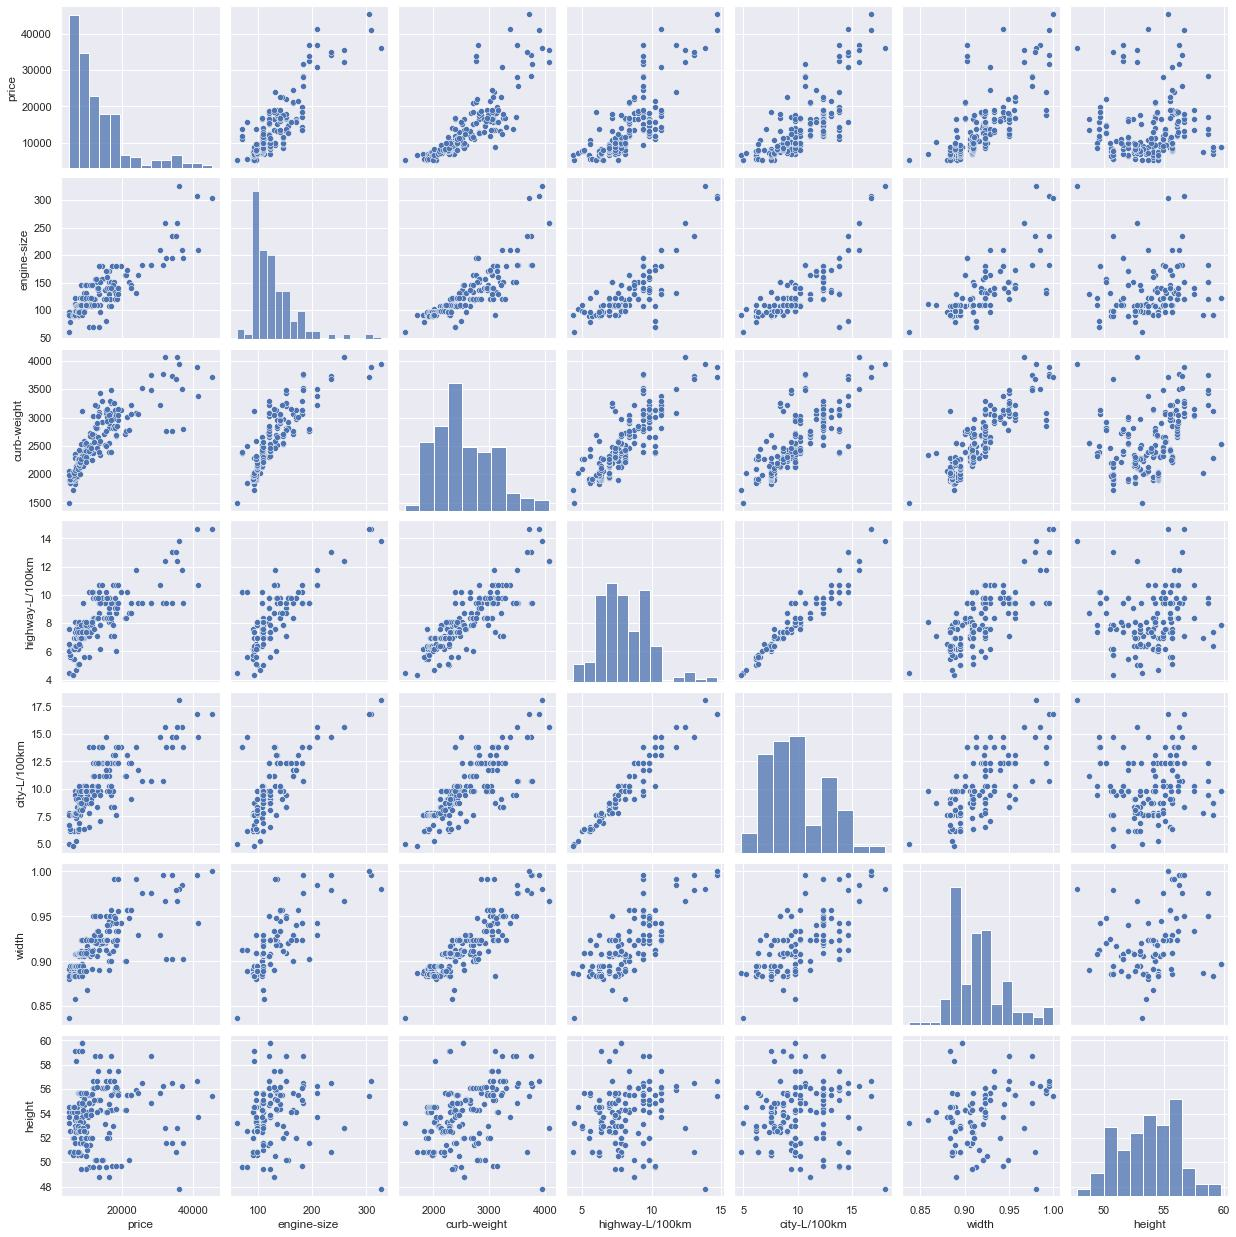

In [364]:
#Lets explore these correlations with sale price further
sns.set()
cols = ['price', 'engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', 'city-L/100km', 'width', 'height']
sns.pairplot(df[cols] , size = 2.5)
plt.show()

Algunas variables representan lo mismo y están altamente correlacionadas, ejemplo:
* width - curb-weight
* highway-L/100km city-L/100km
* engine-size - width

El target *price* tiene algunos outliers por encima de 40000, *engine-size* por encima de 300

<Figure size 864x648 with 0 Axes>

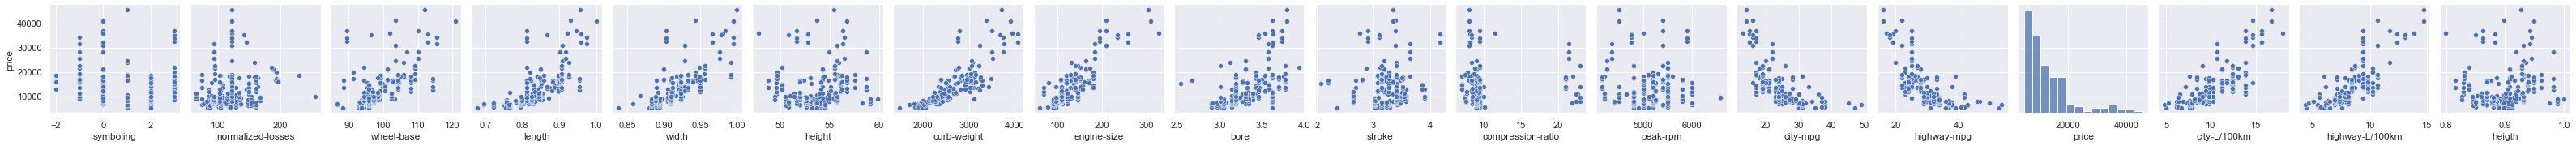

In [297]:
# Relacion entradas vs target
sns.pairplot(data=df, y_vars=['price'])
plt.show()

En general el target precio tiene buenos predictores para predecir algunas columnas representan lo mismo, por lo tanto se pueden dejar por fuera del modelo, otras no aportan mayor relación. En la matriz de correlaciones y hetmap se puede comprobar el impacto entre variables.

Estas son algunas de las más importantes:
* Correlación lineal positiva price city-L/100km, price highway-L/100km
* Correlación lineal negativa price city-mpg, price highway-mpg
* Correlación lineal positiva price curb-weight, price engine-size



(0.0, 53407.33811428384)

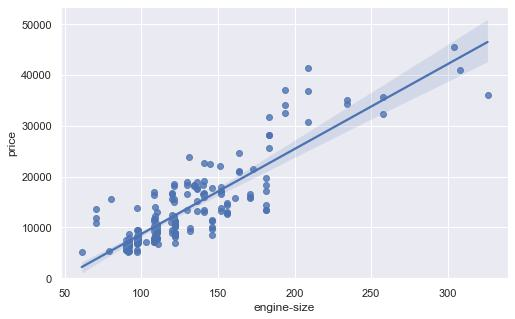

In [381]:
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

El tamaño del motor es un buen predictor para el precio, es una correalación positiva directa que indica entre mas grande el motor el precio aumenta.

<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

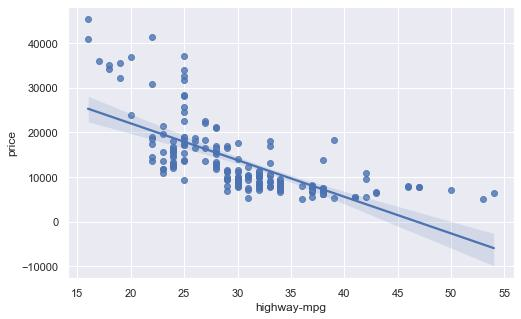

In [388]:

sns.regplot(x="highway-mpg", y="price", data=df)

Correlación inversa negativa, si las millas recorridas aumenta el precio disminuye, también es un buen predictor.

<AxesSubplot: xlabel='curb-weight', ylabel='price'>

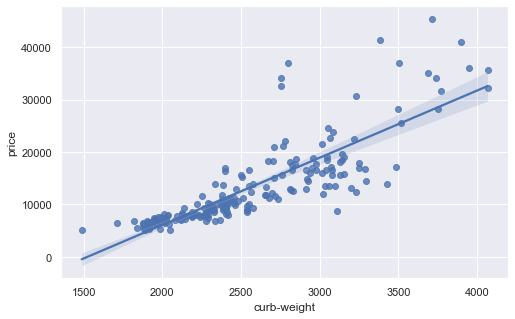

In [391]:
f, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x="curb-weight", y="price", data=df)

El peso al vacío o *curb-weight* también es un predictor importante, esto hace referencia al peso del vehículo incluyendo el tanque de combustible lleno y el resto del equipamiento, a mayor peso al vacío el precio aumenta.



<AxesSubplot: xlabel='body-style', ylabel='price'>

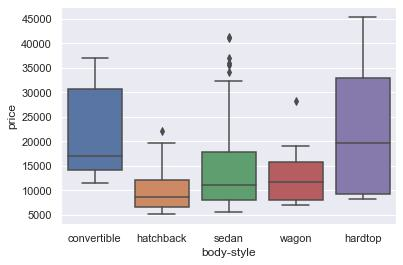

In [293]:
sns.boxplot(x="body-style", y="price", data=df)

Las distribuciones de precios entre las distintas categorías de carrocerías *body-style* se solapan considerablemente, por lo que la carrocería no sería un buen indicador del precio.

<AxesSubplot: xlabel='engine-location', ylabel='price'>

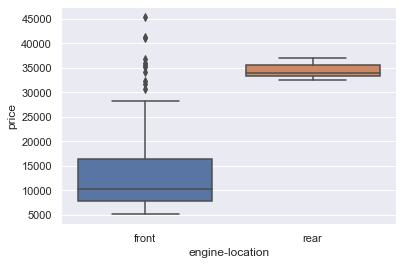

In [294]:
sns.boxplot(x="engine-location", y="price", data=df)

La distribución del precio entre estas dos categorías de ubicación del motor *engine-location*, delantero y trasero , son distintas por lo tanto la ubicación del motor puede ser un buen predictor del precio.

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

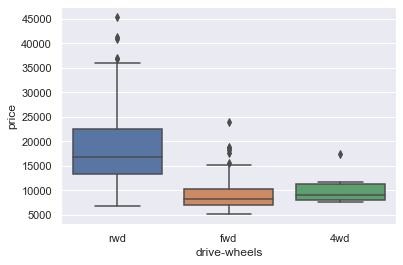

In [295]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

La distribución del precio entre las distintas categorías de ruedas *drive-wheels* es diferente; por lo tanto, las ruedas motrices podrían ser un buen predictor del precio.

# Agrupaciones - groupby - pivot_table

In [299]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Son muy pocos los vehículos con el sistema 4wd

In [298]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


La mayoría de vehículos tienen la ubicación del motor al frente, por lo que *engine-location* no es un buen predictor

In [300]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [301]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Los vehículos mas costosos son los *fwd*, se agrupa por *drive-wheels* y se indica el promedio de cada categoría

In [68]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Tal como el ejemplo anterior con el uso de groupby con las columnas *drive-wheels* y *body-style* se indica el promedio de cada categoría

Con esta función de Pandas tambien se puede resumir y agrupar datos de forma rápida y eficaz

In [302]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot
# Se muestran los datos previamente creados en grouped_test1 se indica cada estilo de carrocería por el conjunto de ruedas

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [303]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot
# Los valores nulos se pueden reemplazar

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

De esta forma se ve el promedio de cada precio con el uso de groupby por cada *body-style*:

In [77]:
df_gptest2 = df[['body-style','price']]
grouped_test2 = df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


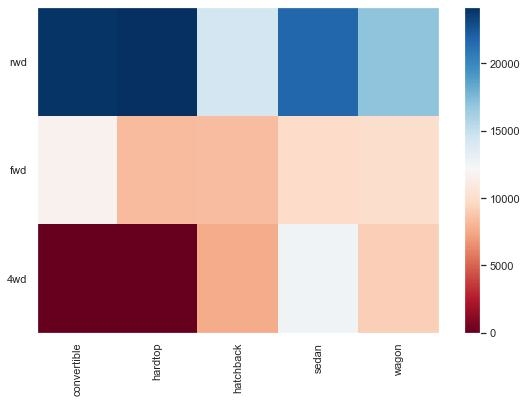

In [195]:
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Heatmap con el impacto de las variables y precio definidos previamente usando *pivot* del dataframe *grouped_pivot*

# Agregaciones y otras funciones

In [82]:
df['num-of-doors'].value_counts() / df['num-of-doors'].value_counts().sum() * 100
# Porcentaje de número de puertas de automóviles

four    57.21393
two     42.78607
Name: num-of-doors, dtype: float64

In [89]:
df['make'].value_counts() / df['make'].value_counts().sum() * 100
# Porcentaje por marcas

toyota           15.920398
nissan            8.955224
mazda             8.457711
mitsubishi        6.467662
honda             6.467662
volkswagen        5.970149
subaru            5.970149
peugot            5.472637
volvo             5.472637
dodge             4.477612
mercedes-benz     3.980100
bmw               3.980100
plymouth          3.482587
audi              2.985075
saab              2.985075
porsche           1.990050
jaguar            1.492537
chevrolet         1.492537
alfa-romero       1.492537
isuzu             0.995025
renault           0.995025
mercury           0.497512
Name: make, dtype: float64

In [304]:
df.groupby(['make','body-style'])[['price', 'highway-mpg']].aggregate([np.mean,np.max,np.min])
# aggregate() con price y highway-mpg, el precio de muesta con aggregate() en valores mínimos y máximos

price                   highway-mpg       \
                                   mean     amax     amin        mean amax   
make          body-style                                                     
alfa-romero   convertible  14997.500000  16500.0  13495.0   27.000000   27   
              hatchback    16500.000000  16500.0  16500.0   26.000000   26   
audi          sedan        17647.000000  23875.0  13950.0   24.400000   30   
              wagon        18920.000000  18920.0  18920.0   25.000000   25   
bmw           sedan        26118.750000  41315.0  16430.0   25.375000   29   
chevrolet     hatchback     5723.000000   6295.0   5151.0   48.000000   53   
              sedan         6575.000000   6575.0   6575.0   43.000000   43   
dodge         hatchback     7819.800000  12964.0   5572.0   34.200000   41   
              sedan         7619.666667   8558.0   6692.0   35.333333   38   
              wagon         8921.000000   8921.0   8921.0   30.000000   30   
honda         hatchback     7054.428571   9095.0   5399.0   38.285714   54   
              sedan         9945.000000  12945.0   7295.0   31.800000   34   
              wagon         7295.000000   7295.0   7295.0   34.000000   34   
isuzu         hatchback    11048.000000  11048.0  11048.0   29.000000   29   
              sedan         6785.000000   6785.0   6785.0   29.000000   29   
jaguar        sedan        34600.000000  36000.0  32250.0   18.333333   19   
mazda         hatchback    10085.000000  15645.0   5195.0   29.500000   38   
              sedan        11464.142857  18344.0   6695.0   35.428571   42   
mercedes-benz convertible  35056.000000  35056.0  35056.0   18.000000   18   
              hardtop      36788.000000  45400.0  28176.0   20.500000   25   
              sedan        33074.000000  40960.0  25552.0   21.000000   25   
              wagon        28248.000000  28248.0  28248.0   25.000000   25   
mercury       hatchback    16503.000000  16503.0  16503.0   24.000000   24   
mitsubishi    hatchback     9597.888889  14869.0   5389.0   31.222222   41   
              sedan         8434.000000   9279.0   6989.0   31.000000   32   
nissan        hardtop       8249.000000   8249.0   8249.0   37.000000   37   
              hatchback    14409.000000  19699.0   7799.0   28.800000   37   
              sedan         8604.555556  13499.0   5499.0   35.111111   50   
              wagon         9915.666667  14399.0   7349.0   32.000000   37   
peugot        sedan        15758.571429  18150.0  11900.0   27.857143   33   
              wagon        15017.500000  17075.0  12440.0   24.500000   25   
plymouth      hatchback     8130.500000  12764.0   5572.0   33.250000   41   
              sedan         7150.500000   7609.0   6692.0   38.000000   38   
              wagon         8921.000000   8921.0   8921.0   30.000000   30   
porsche       convertible  37028.000000  37028.0  37028.0   25.000000   25   
              hardtop      33278.000000  34028.0  32528.0   25.000000   25   
              hatchback    22018.000000  22018.0  22018.0   27.000000   27   
renault       hatchback     9895.000000   9895.0   9895.0   31.000000   31   
              wagon         9295.000000   9295.0   9295.0   31.000000   31   
saab          hatchback    15013.333333  18150.0  11850.0   27.333333   28   
              sedan        15433.333333  18620.0  12170.0   27.333333   28   
subaru        hatchback     6591.333333   7603.0   5118.0   32.666667   36   
              sedan         9070.600000  11259.0   7126.0   31.200000   37   
              wagon         9342.000000  11694.0   7463.0   28.750000   32   
toyota        convertible  17669.000000  17669.0  17669.0   30.000000   30   
              hardtop       9762.333333  11199.0   8449.0   30.000000   30   
              hatchback     9616.000000  16558.0   5348.0   33.428571   47   
              sedan         9542.200000  15690.0   6938.0   34.000000   47   
              wagon         9836.000000  15750.0   6918.

Con el uso de groupby se puede agrupar por columnas y en el ejemplo anterior ver el consumo en millas y el precio por cada marca y su estilo

Se agrega la columna *'count-column'* para hacer el conteo y ver la cantidad por marca y estilo

In [305]:
df['count-column'] = 1 # Agregar columna

In [307]:
# ===============================================================================================
# De esta forma con el uso de groupby y la columna count-column, se cuenta cada marca y su estilo
df_g = df.groupby(['make','body-style'])[['count-column']].sum()
df_g.head(10)

count-column
make        body-style               
alfa-romero convertible             2
            hatchback               1
audi        sedan                   5
            wagon                   1
bmw         sedan                   8
chevrolet   hatchback               2
            sedan                   1
dodge       hatchback               5
            sedan                   3
            wagon                   1

Mediante función lambda se obtiene el mismo resultado del groupby:

In [308]:
df_g.groupby(level=0).apply( lambda x: x / x.sum() * 100 )
df_g.head(10)

count-column
make        body-style               
alfa-romero convertible             2
            hatchback               1
audi        sedan                   5
            wagon                   1
bmw         sedan                   8
chevrolet   hatchback               2
            sedan                   1
dodge       hatchback               5
            sedan                   3
            wagon                   1

Con el uso de pivot_table se puede generalizar groupby adicionando otros métodos:

In [309]:
# ========================================================================================================
# Este ejemplo agrupa con pivot_table la marca del vehículo y su estilo y se agrega promedio y mediana
# Los valores nulos indican que no hay valores para dicha categoría
df_pivot = df.pivot_table(values='price', index='make', columns='body-style', aggfunc=[np.mean,np.median])
df_pivot.head(10)       


mean                                                \
body-style    convertible  hardtop     hatchback         sedan    wagon   
make                                                                      
alfa-romero       14997.5      NaN  16500.000000           NaN      NaN   
audi                  NaN      NaN           NaN  17647.000000  18920.0   
bmw                   NaN      NaN           NaN  26118.750000      NaN   
chevrolet             NaN      NaN   5723.000000   6575.000000      NaN   
dodge                 NaN      NaN   7819.800000   7619.666667   8921.0   
honda                 NaN      NaN   7054.428571   9945.000000   7295.0   
isuzu                 NaN      NaN  11048.000000   6785.000000      NaN   
jaguar                NaN      NaN           NaN  34600.000000      NaN   
mazda                 NaN      NaN  10085.000000  11464.142857      NaN   
mercedes-benz     35056.0  36788.0           NaN  33074.000000  28248.0   

                   median                                       
body-style    convertible  hardtop hatchback    sedan    wagon  
make                                                            
alfa-romero       14997.5      NaN   16500.0      NaN      NaN  
audi                  NaN      NaN       NaN  17450.0  18920.0  
bmw                   NaN      NaN       NaN  22835.0      NaN  
chevrolet             NaN      NaN    5723.0   6575.0      NaN  
dodge                 NaN      NaN    6377.0   7609.0   8921.0  
honda                 NaN      NaN    6855.0  10295.0   7295.0  
isuzu                 NaN      NaN   11048.0   6785.0      NaN  
jaguar                NaN      NaN       NaN  35550.0      NaN  
mazda                 NaN      NaN   10770.0  10245.0      NaN  
mercedes-benz     35056.0  36788.0       NaN  32892.0  28248.0

# Funciones y valores

En caso de transformar una columna numérica se utiliza una función para convertir dicho y ver resultados

In [310]:
# =================================================================================
# Esta función convierte toma el promedio en millas y lo convierte a kilómetros
def mean_km_consum(x):
    y = np.mean(x)*1.609344
    return y

De esta manera se convierte *city-mpg* a kilómetros, esta columna indica el promedio del consumo de combustible, se aprecia el consumo por marca:

In [311]:
df.groupby('make')[['city-mpg']].apply(mean_km_consum)

,city-mpg
make,
alfa-romero,32.723328
audi,31.113984
bmw,31.181040
chevrolet,65.983104
dodge,45.061632
honda,48.899298
isuzu,38.624256
jaguar,23.067264
mazda,41.369608


Se puede agregar en forma de diccionario con clave-valor y luego agrupar

In [312]:
# ========================================================================================
# Se agregar al diccionario valores mínimo y máximo del precio
# El promedio del consumo en millas y en kilómetros (se incluye la función mean_km_consum)
dict_agg = {'price':[min, max],'city-mpg':[np.mean, mean_km_consum]}
dict_agg   

{'price': [<function min>, <function max>],
 'city-mpg': [<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>,
  <function __main__.mean_km_consum(x)>]}

Los valores se agrupan por marca y estilo y se agrega junto a los valores del diccionario creado previamente:

In [313]:
df.groupby(['make','body-style'])[['city-mpg','price']].agg(dict_agg) # aqui lo agrupa y lo muestra

price            city-mpg               
                               min      max       mean mean_km_consum
make          body-style                                             
alfa-romero   convertible  13495.0  16500.0  21.000000      33.796224
              hatchback    16500.0  16500.0  19.000000      30.577536
audi          sedan        13950.0  23875.0  19.400000      31.221274
              wagon        18920.0  18920.0  19.000000      30.577536
bmw           sedan        16430.0  41315.0  19.375000      31.181040
chevrolet     hatchback     5151.0   6295.0  42.500000      68.397120
              sedan         6575.0   6575.0  38.000000      61.155072
dodge         hatchback     5572.0  12964.0  28.400000      45.705370
              sedan         6692.0   8558.0  28.666667      46.134528
              wagon         8921.0   8921.0  24.000000      38.624256
honda         hatchback     5399.0   9095.0  33.142857      53.338258
              sedan         7295.0  12945.0  26.600000      42.808550
              wagon         7295.0   7295.0  30.000000      48.280320
isuzu         hatchback    11048.0  11048.0  24.000000      38.624256
              sedan         6785.0   6785.0  24.000000      38.624256
jaguar        sedan        32250.0  36000.0  14.333333      23.067264
mazda         hatchback     5195.0  15645.0  23.700000      38.141453
              sedan         6695.0  18344.0  28.571429      45.981257
mercedes-benz convertible  35056.0  35056.0  16.000000      25.749504
              hardtop      28176.0  45400.0  18.000000      28.968192
              sedan        25552.0  40960.0  18.500000      29.772864
              wagon        28248.0  28248.0  22.000000      35.405568
mercury       hatchback    16503.0  16503.0  19.000000      30.577536
mitsubishi    hatchback     5389.0  14869.0  25.333333      40.770048
              sedan         6989.0   9279.0  24.000000      38.624256
nissan        hardtop       8249.0   8249.0  31.000000      49.889664
              hatchback     7799.0  19699.0  22.600000      36.371174
              sedan         5499.0  13499.0  29.222222      47.028608
              wagon         7349.0  14399.0  26.333333      42.379392
peugot        sedan        11900.0  18150.0  22.714286      36.555099
              wagon        12440.0  17075.0  22.000000      35.405568
plymouth      hatchback     5572.0  12764.0  27.750000      44.659296
              sedan         6692.0   7609.0  31.000000      49.889664
              wagon         8921.0   8921.0  24.000000      38.624256
porsche       convertible  37028.0  37028.0  17.000000      27.358848
              hardtop      32528.0  34028.0  17.000000      27.358848
              hatchback    22018.0  22018.0  19.000000      30.577536
renault       hatchback     9895.0   9895.0  23.000000      37.014912
              wagon         9295.0   9295.0  23.000000      37.014912
saab          hatchback    11850.0  18150.0  20.333333      32.723328
              sedan        12170.0  18620.0  20.333333      32.723328
subaru        hatchback     5118.0   7603.0  27.666667      44.525184
              sedan         7126.0  11259.0  26.800000      43.130419
              wagon         7463.0  11694.0  24.750000      39.831264
toyota        convertible  17669.0  17669.0  24.000000      38.624256
              hardtop       8449.0  11199.0  24.000000      38.624256
              hatchback     5348.0  16558.0  27.785714      44.716773
              sedan         6938.0  15690.0  29.100000      46.831910
              wagon         6918.0  15750.0  26.000000      41.842944
volkswagen    convertible  11595.0  11595.0  24.000000      38.624256
              hatchback     9980.0   9980.0  24.000000      38.624256
              sedan         7775.0  13845.0  30.000000      48.280320
              wagon        12290.0  12290.0  25.000000      40.233600
volvo         sedan        12940.0  22625.0  21.125000      33.997392
              wagon        13415.0  189

Filtro por promedio del consumo de combustible:

In [314]:
def f_filter(x):
    return mean_km_consum(x['city-mpg']) > 30

In [315]:
# ==================================================================
# Filtro cuyo consumo es mayor a 30 km, agrupados por marca y estilo
df_filtered = df.groupby(['make','body-style']).filter(f_filter)
df_filtered.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,heigth,count-column
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0.816054,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0.816054,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0.876254,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0.908027,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0.908027,1
